In [21]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('https://celsobrf.github.io/Projeto-Machine-Learning/smoking_driking_dataset_Ver01.csv')

In [3]:
df

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170.0,75.0,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180.0,80.0,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165.0,75.0,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175.0,80.0,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165.0,60.0,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664144,Male,30,175.0,65.0,76.2,1.2,1.0,1.0,1.0,110.0,...,103.0,69.0,16.4,2.0,0.7,20.0,18.0,17.0,3.0,N
664145,Male,40,180.0,90.0,94.0,1.5,1.0,1.0,1.0,142.0,...,151.0,484.0,17.6,2.0,1.3,25.0,54.0,149.0,2.0,Y
664146,Male,40,165.0,80.0,89.0,1.0,1.0,1.0,1.0,130.0,...,150.0,239.0,16.7,3.0,1.2,39.0,43.0,53.0,3.0,Y
664147,Female,75,155.0,65.0,97.0,0.7,0.7,2.0,2.0,122.0,...,86.0,201.0,13.7,1.0,0.7,17.0,16.0,21.0,1.0,N


In [4]:
print("Shape",df.shape)
print(df.describe())

Shape (664149, 24)
                 age         height         weight      waistline  \
count  664149.000000  664148.000000  664148.000000  664148.000000   
mean       47.620014     162.249920      63.296675      81.245254   
std        14.176370       9.274958      12.514905      11.897604   
min        20.000000     130.000000      25.000000      27.000000   
25%        35.000000     155.000000      55.000000      74.200000   
50%        45.000000     160.000000      60.000000      81.000000   
75%        60.000000     170.000000      70.000000      87.800000   
max        85.000000     190.000000     140.000000     999.000000   

          sight_left    sight_right      hear_left     hear_right  \
count  664148.000000  664148.000000  664148.000000  664148.000000   
mean        0.981237       0.978953       1.031463       1.030535   
std         0.608153       0.607187       0.174565       0.172055   
min         0.100000       0.100000       1.000000       1.000000   
25%         0.

In [18]:
# Verificando valores faltantes
df.isna().sum()

sex                 0
age                 0
height              1
weight              1
waistline           1
sight_left          1
sight_right         1
hear_left           1
hear_right          1
SBP                 1
DBP                 1
BLDS                1
tot_chole           1
HDL_chole           1
LDL_chole           1
triglyceride        1
hemoglobin          1
urine_protein       1
serum_creatinine    1
SGOT_AST            1
SGOT_ALT            1
gamma_GTP           1
smoking_history     1
drinking_history    1
dtype: int64

In [20]:
# Verifiando linha duplicadas
df[df.duplicated].shape

# Removendo as duplicadas
df = df.drop_duplicates(keep='first')
df[df.duplicated].shape

(0, 24)

In [5]:
# Devido ao tamanho do dataset, iremos trabalhar com uma amostra representativa dele (20%)
# Ao fazer as análises necessárias e fazer com que um modelo trabalhe bem em cima desse sample,
# faremos com que ele rode em cima de todos os dados e avaliaremos sua performance.

df_20 = df.sample(frac=0.2)
df_20

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
270034,Male,40,180.0,90.0,98.0,1.5,1.5,1.0,1.0,145.0,...,165.0,198.0,16.4,1.0,1.0,20.0,17.0,97.0,3.0,Y
613768,Male,40,180.0,90.0,93.0,1.2,1.5,1.0,1.0,122.0,...,84.0,91.0,16.5,1.0,1.2,45.0,108.0,54.0,3.0,Y
253029,Female,45,150.0,55.0,79.0,1.0,1.0,1.0,1.0,118.0,...,175.0,130.0,13.2,1.0,0.9,21.0,20.0,18.0,1.0,N
584033,Male,40,175.0,55.0,73.0,1.2,1.5,1.0,1.0,115.0,...,80.0,30.0,14.5,1.0,1.0,19.0,12.0,20.0,1.0,Y
4398,Male,25,175.0,70.0,86.0,1.5,1.5,1.0,1.0,110.0,...,113.0,102.0,16.5,1.0,1.3,23.0,23.0,30.0,2.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239947,Female,35,170.0,60.0,75.0,1.2,1.5,1.0,1.0,119.0,...,151.0,89.0,14.4,1.0,0.5,17.0,12.0,15.0,1.0,N
194309,Male,60,165.0,75.0,88.2,1.5,1.0,1.0,1.0,127.0,...,73.0,197.0,15.0,1.0,1.1,27.0,32.0,24.0,2.0,Y
41705,Female,25,160.0,50.0,65.0,0.9,0.8,1.0,1.0,100.0,...,118.0,50.0,12.3,1.0,0.6,27.0,17.0,12.0,1.0,N
395920,Female,70,155.0,60.0,84.0,0.9,0.8,1.0,1.0,135.0,...,129.0,190.0,14.2,1.0,0.8,30.0,22.0,21.0,1.0,N


Iniciaremos com uma anáise dos dados para depois prosseguirmos com uma preparação dos dados e treinamento de um modelo

In [6]:
df.dtypes

sex                  object
age                   int64
height              float64
weight              float64
waistline           float64
sight_left          float64
sight_right         float64
hear_left           float64
hear_right          float64
SBP                 float64
DBP                 float64
BLDS                float64
tot_chole           float64
HDL_chole           float64
LDL_chole           float64
triglyceride        float64
hemoglobin          float64
urine_protein       float64
serum_creatinine    float64
SGOT_AST            float64
SGOT_ALT            float64
gamma_GTP           float64
SMK_stat_type_cd    float64
DRK_YN               object
dtype: object

Os dados de todas as colunas são do tipo numérico, com exceção da coluna `sexo` e da coluna `Bebe_SN`.

In [8]:
# Renomeando colunas
df = df.rename({'SMK_stat_type_cd':'smoking_history','DRK_YN':'drinking_history'}, axis = 'columns')

In [9]:
# Explorando com visualizações
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
## Como não quero fazer nenhuma alteração no conjunto de dados original, criarei uma cópia
df_two = df.copy()

## O tipo de coluna de sexo é alterado para numérico
df_two['sex'] = df_two['sex'].map({'Male':1,'Female':2})
df_two['drinking_history'] = df_two['drinking_history']. map({'Y':1,'N':0})

Text(0.5, 1.0, 'Correlation Heatmap')

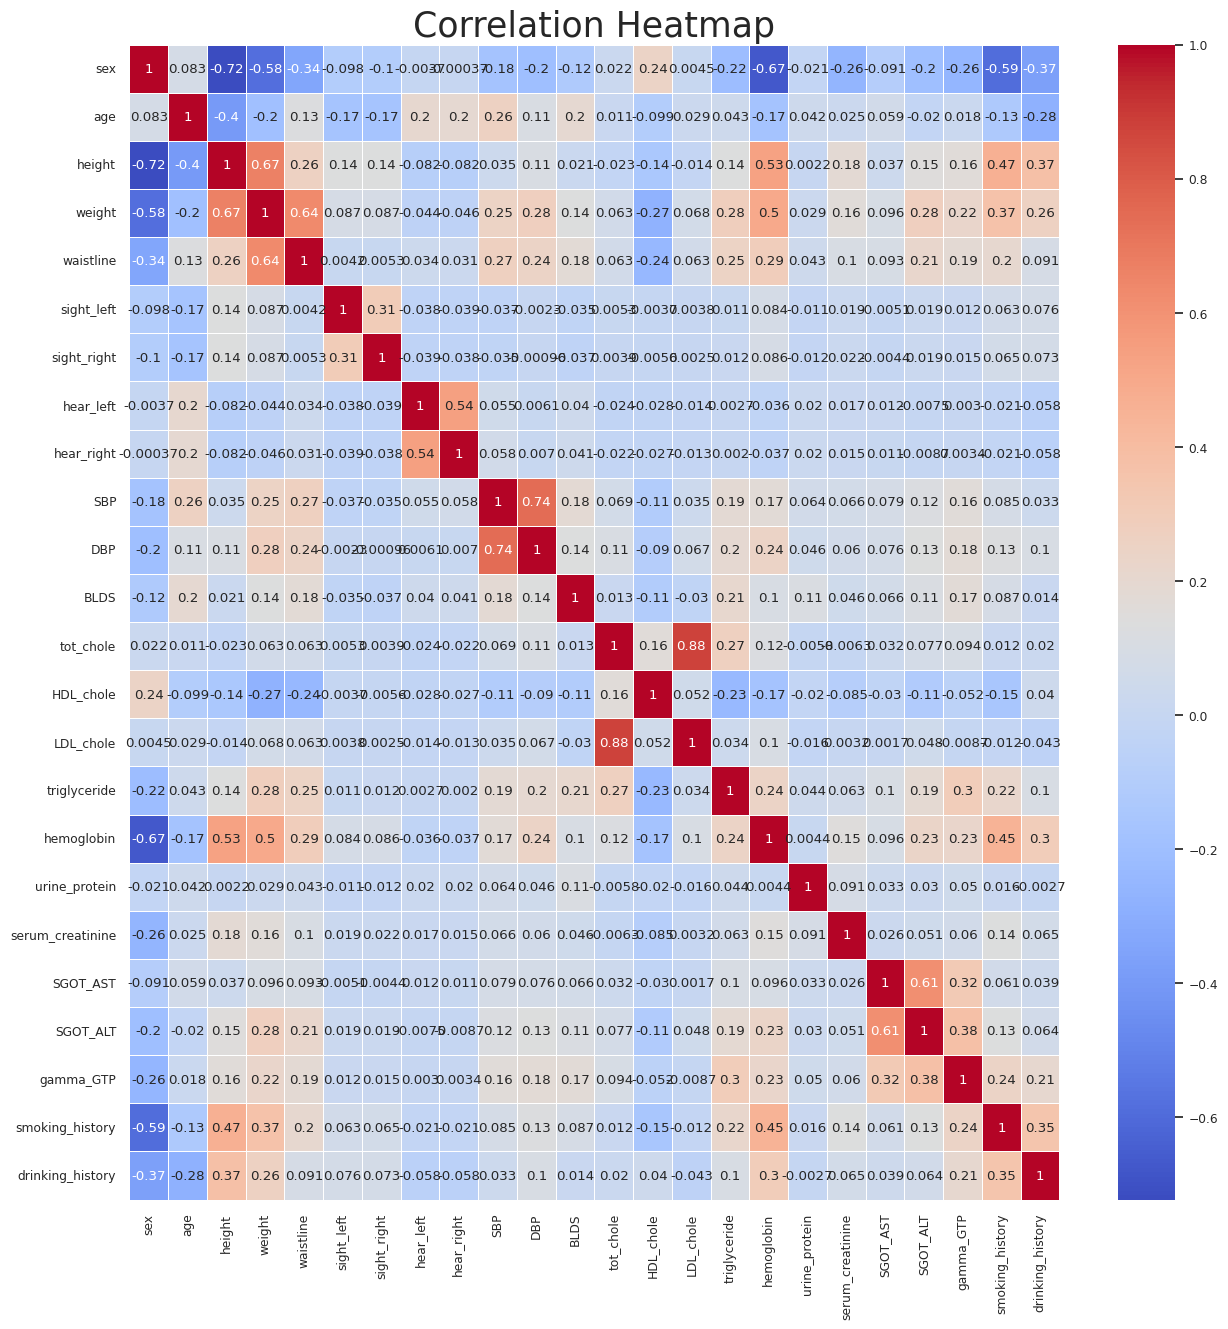

In [13]:
# Correlação
corr_matrix = df_two.corr()

plt.figure(figsize = (15,15))
sns.set(font_scale=0.8)

sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Heatmap',fontsize = 25)

<Axes: xlabel='smoking_history', ylabel='count'>

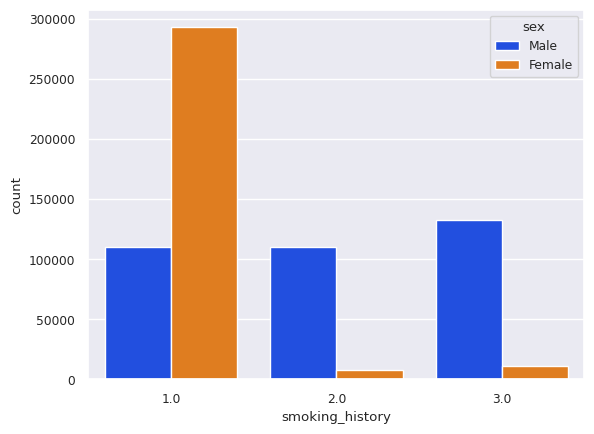

In [15]:
# Sexo por polulação
sns.countplot(data = df, x='smoking_history',hue='sex',palette='bright')

In [16]:
non_smokers = df[df['smoking_history'] == 1.0]
ex_smokers = df[df['smoking_history'] == 2.0]
smokers = df[df['smoking_history'] == 3.0]

Text(0.5, 1.0, 'Smokers')

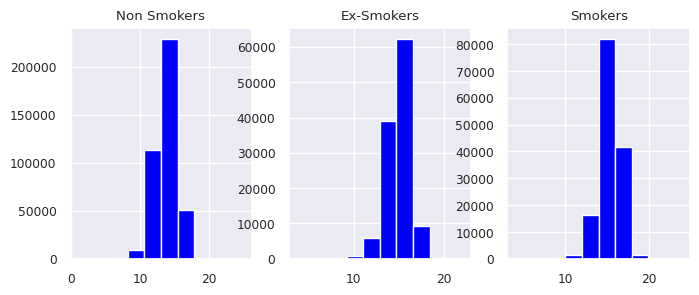

In [22]:
fig,axes = plt.subplots (nrows=1,ncols=3,figsize =(8,3))


axes[0].hist(non_smokers['hemoglobin'],color = 'blue')
axes[0].set_title('Non Smokers')
axes[1].hist(ex_smokers['hemoglobin'],color = 'blue')
axes[1].set_title('Ex-Smokers')
axes[2].hist(smokers['hemoglobin'],color = 'blue')
axes[2].set_title('Smokers')

In [24]:
# Preparando para o modelo
X=df.drop(columns=['drinking_history'],axis=1)
y = df.drinking_history

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [27]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix ,classification_report